<a href="https://colab.research.google.com/github/Maynul-haque/web_scraping_project/blob/main/hss_webscrapling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install anvil-uplink

In [ ]:
pip install xlrd

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#from tabulate import tabulate
pd.set_option('display.width', 5000)
import matplotlib.pyplot as plt
import anvil.mpl_util
import anvil.server
import anvil.tables as tables
from anvil.tables import app_tables

In [ ]:
anvil.server.connect("56QKF5UQYD2UTTLNTYKDW7HY-IZ5NVFY5T7JHEZG2")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
df = pd.DataFrame()

In [ ]:
def import_dataframe(dataframe):
    for d in dataframe.to_dict(orient="records"):
      # d is now a dict of {columnname -> value} for this row
      # We use Python's **kwargs syntax to pass the whole dict as
      # keyword arguments
      app_tables.my_table.add_row(**d)

In [ ]:
@anvil.server.callable
def show_ranking():
  url = 'http://103.247.238.92/webportal/pages/hss_menu_facility.php?facilitytype_id=29&division_id=&district_id='
  r = requests.get(url)
  soup = BeautifulSoup(r.content, 'lxml')
  table_row = soup.find('div', {'class':"box-body"}).find_all('tr')


  tab_link =[]
  for i in table_row:
    if (i.find('td', text = 'Cumilla')) !=  None:
      tab_link.append(i)

  name = [i.find('a').get_text() for i in tab_link ]

  all_numbers=[i.find_all("td",{"style":"text-align:center;"}) for i in tab_link]
  rank = []
  for i in all_numbers:
    j = i[0].get_text()
    rank.append(j)
  
  score = []
  for k in all_numbers:
    l = k[1].get_text()
    score.append(l)

  links_upazilla =['http://103.247.238.92/webportal/pages/'+i.find('a').get('href') for i in tab_link]

  
  df["Current Rank"] = rank
  df['Name'] = name
  df['Name'] = [df['Name'][i].split()[0] for i in range(0, len(df['Name']))]
  df["Score (300)"] = score
  df["Score (300)"] = df['Score (300)'].astype(float)
  df['Link'] = links_upazilla
  plt.figure(figsize=(20, 8))
  plt.barh(df['Name'], df['Score (300)'] )
  plt.title("Ranking")
  # for i, v in enumerate(y):
  #   plt.text(v + 1, i + .00, str(v),
  #           color = 'blue', fontweight = 'bold')
  # plt.rc('ytick', labelsize =15)

  

  return anvil.mpl_util.plot_image()

In [ ]:
show_ranking()

 Select number of table 
------------------------------- 
0. Service Delivery- 6.4 , Per indicator mark- 1.28
1. Health Workforce- 6.4 , Per indicator mark- 1.6
2. Health Information System- 6.4 , Per indicator mark- 1.6
3. Access to Essential Medicines/ Equipment, logistics/ Utilities/ Infrastructure- 6.37 , Per indicator mark- 0.91
4 Leadership/ Governance/ Management- 6.43 , Indicator mark - 3.215
5. Access- 12 ,  Indicator mark - 6
6. Quality- 12 ,  Indicator mark - 3
7. Coverage -12 ,  Indicator mark- 4
8. Safety -12 , Indicator mark - 12
9. Onsite Monitoring -20 , Indicator mark - 20 

In [ ]:
dict = {
    'Service Delivery':0,
'Health Workforce':1,
'Health Information System':2,
'Access to Essential Medicines/ Equipment, logistics/ Utilities/ Infrastructure':3,
'Access':4,
'Quality':5,
'Coverage':6,
'Safety':7,
'Onsite Monitoring':8
}

In [ ]:
@anvil.server.callable
def get_data(upazilla,table_no):
  tab = pd.read_html(df['Link'][df.index[df['Name'] == upazilla].tolist()[0]])[dict[table_no]].drop(['Definition','Dataset','Period','Numerator','Denominator','Score Calculation','Trend'], axis = 1)
  # return tab
  plt.figure(figsize=(20, 4))
  plt.title("table")
  plt.barh(tab['Indicators'], tab['Score'] )

  return anvil.mpl_util.plot_image()

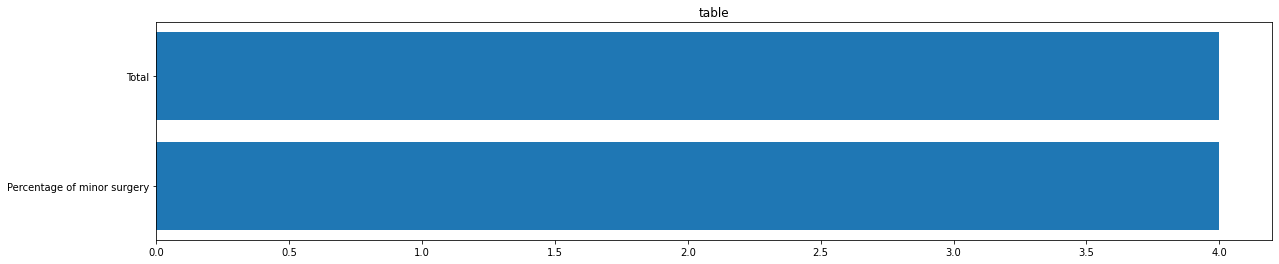

In [ ]:
get_data('Laksham','Safety')

In [ ]:
anvil.server.wait_forever()

In [ ]:
def get_table(upazilla,table):
  d = pd.read_html(df['Link'][upazilla])
  print(f"\nupazilla:{df['Name'][upazilla]}\n---------------------------\n")
  #d_table = d[table].loc[:, df.columns!='Definition']
  print(tabulate(d[table].drop(['Definition','Trend','Score Calculation'], axis=1),headers="keys",tablefmt="orgtbl"))

In [ ]:
# Get specific table for all upazilla
for i in range(0,15):
  get_table(i,1)

In [ ]:
tab = pd.read_html(df['Link'][int(df[df['Name']=='Muradnagar'].index.values)])[1]
type(tab)

pandas.core.frame.DataFrame

In [ ]:
df1 = pd.read_html(df['Link'][0])[1].drop(['Definition','Dataset','Period','Numerator','Denominator','Score Calculation','Trend'], axis = 1)
df1['Upazila'] = df['Name'][0]
for i in range(1,len(df['Link'])):
  current_df = pd.read_html(df['Link'][i])[1].drop(['Definition','Dataset','Period','Numerator','Denominator','Score Calculation','Trend'], axis = 1)
  current_df['Upazila'] = df['Name'][i]
  df1.append(current_df)

In [ ]:
df1 = pd.read_html(df['Link'][0])[1].drop(['Definition','Dataset','Period','Numerator','Denominator','Score Calculation','Trend'], axis = 1)
df1['Upazila'] = df['Name'][0]
df1

,Indicators,Score,Upazila
0,Functionality of the biometric attendance mach...,1.600,Daudkandi
1,Presence of average no. of staffs,1.017,Daudkandi
2,Completeness of HRM data (Facility),1.600,Daudkandi
3,Completeness of HRM data (Provider),1.592,Daudkandi
4,Total,5.810,Daudkandi


In [ ]:
df.head(20)

,Current Rank,Name,Score (300),Link
0,10,Daudkandi,79.48,http://103.247.238.92/webportal/pages/hss_scor...
1,39,Chaddagram,78.12,http://103.247.238.92/webportal/pages/hss_scor...
2,143,Laksham,73.67,http://103.247.238.92/webportal/pages/hss_scor...
3,162,Barura,72.85,http://103.247.238.92/webportal/pages/hss_scor...
4,169,Debidwar,72.46,http://103.247.238.92/webportal/pages/hss_scor...
5,179,Burichong,71.85,http://103.247.238.92/webportal/pages/hss_scor...
6,242,Meghna,68.81,http://103.247.238.92/webportal/pages/hss_scor...
7,285,Muradnagar,65.51,http://103.247.238.92/webportal/pages/hss_scor...
8,300,Nangolkot,63.76,http://103.247.238.92/webportal/pages/hss_scor...
9,303,Titas,63.22,http://103.247.238.92/webportal/pages/hss_scor...
